## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df = mouse_metadata.merge(study_results,on="Mouse ID",how="outer")

# Display the data table for preview
combo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combo_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = combo_df.drop_duplicates()

clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combo_df[combo_df.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Done above ^

In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


mean_df = pd.DataFrame(clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"])
mean_df = mean_df.rename(columns={"Tumor Volume (mm3)":"Mean"})
std_df = pd.DataFrame(clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"])
std_df = std_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
var_df = pd.DataFrame(clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"])
var_df = var_df.rename(columns={"Tumor Volume (mm3)":"Variance"})
sem_df = pd.DataFrame(clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"])
sem_df = sem_df.rename(columns={"Tumor Volume (mm3)":"SEM"})
median_df = pd.DataFrame(clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"])
median_df = median_df.rename(columns={"Tumor Volume (mm3)":"Median"})

summary_df = mean_df.merge(std_df,on="Drug Regimen")
summary_df = summary_df.merge(var_df,on="Drug Regimen")
summary_df = summary_df.merge(sem_df,on="Drug Regimen")
summary_df = summary_df.merge(median_df,on="Drug Regimen")

summary_df


,Mean,Standard Deviation,Variance,SEM,Median
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,0.329346,41.557809
Ceftamin,52.591172,6.268188,39.290177,0.469821,51.776157
Infubinol,52.884795,6.567243,43.128684,0.492236,51.820584
Ketapril,55.235638,8.279709,68.553577,0.603860,53.698743
Naftisol,54.331565,8.134708,66.173479,0.596466,52.509285
Placebo,54.033581,7.821003,61.168083,0.581331,52.288934
Propriva,52.368318,6.502160,42.278090,0.514041,50.909965
Ramicane,40.216745,4.846308,23.486704,0.320955,40.673236
Stelasyn,54.233149,7.710419,59.450562,0.573111,52.431737


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_df = []
summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean,np.std,np.var,st.sem,np.median])
summary_df


C:\Users\metatron\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\metatron\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\metatron\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,std,var,sem,median
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,0.329346,41.557809
Ceftamin,52.591172,6.268188,39.290177,0.469821,51.776157
Infubinol,52.884795,6.567243,43.128684,0.492236,51.820584
Ketapril,55.235638,8.279709,68.553577,0.603860,53.698743
Naftisol,54.331565,8.134708,66.173479,0.596466,52.509285
Placebo,54.033581,7.821003,61.168083,0.581331,52.288934
Propriva,52.368318,6.502160,42.278090,0.514041,50.909965
Ramicane,40.216745,4.846308,23.486704,0.320955,40.673236
Stelasyn,54.233149,7.710419,59.450562,0.573111,52.431737


## Bar and Pie Charts

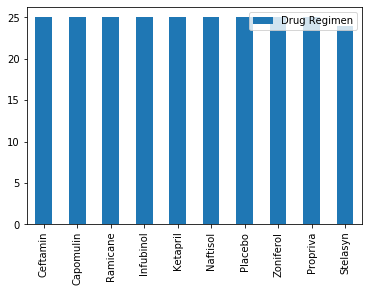

In [50]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
short_df = clean_df[["Mouse ID","Drug Regimen"]].drop_duplicates()
mouse_count_df = pd.DataFrame(short_df["Drug Regimen"].value_counts())
mouse_count_df.plot.bar()


<BarContainer object of 10 artists>

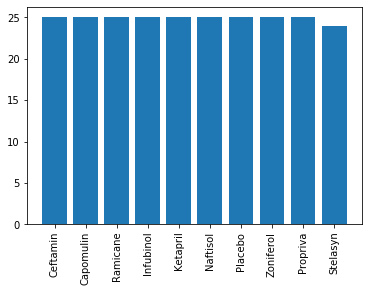

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
xlab = mouse_count_df.index
ylab = mouse_count_df["Drug Regimen"]
plt.xticks(rotation=90)
plt.bar(xlab,ylab)

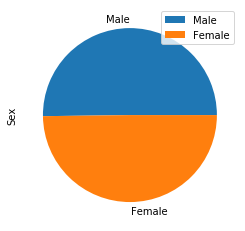

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df[["Mouse ID","Sex"]].drop_duplicates()
gender_count_df = pd.DataFrame(gender_df["Sex"].value_counts())
gender_count_df.plot.pie(y="Sex")


([<matplotlib.patches.Wedge at 0x1fff2c2f248>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

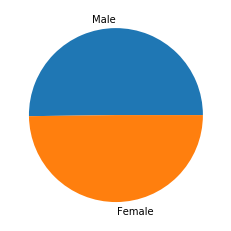

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_count_df.index
sizes = gender_count_df["Sex"]
plt.pie(sizes,labels=labels)


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
